<a href="https://colab.research.google.com/github/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/blob/main/Part_1_Deep_Learning_with_PyTorch/week_05/week_5_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Arewa DataScience Academy
### Deep Learning Cohort 1.0

#### WEEK 5 Exercises

Name : mohammed nasiru

email: katada3020@gmail.com


In [1]:
# Check for GPU
!nvidia-smi

Thu Feb  1 15:44:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
# Importing  torch
import torch
from torch import nn
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 1.What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

Underfitting occurs when a model is too simple to capture the patterns in the data, leading to poor performance both on the training data and unseen data. Here are three methods to prevent underfitting:

1 Increase Model Complexity: By using models with more parameters or layers, you give them the capacity to capture more intricate relationships in your data, reducing the risk of underfitting.

2Reduce Feature Noise: Cleaning your data by removing irrelevant noise or outliers can help the model focus on genuine patterns, leading to better fitting without overfitting.
3
Increase Training Data: Providing the model with more examples allows it to learn a broader range of patterns and nuances, minimizing the chance of underfitting specific aspects of your data.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [ ]:
# get the data
import requests
import zipfile
from pathlib import Path
#set up path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_sushi_steak"

# if image path is a directory, do not download it
if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True,exist_ok=True)
    # download pizza sushi and steak data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)



In [11]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [12]:
# walk path
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_sushi_steak'.
There are 3 directories and 0 images in 'data/pizza_sushi_steak/train'.
There are 0 directories and 75 images in 'data/pizza_sushi_steak/train/steak'.
There are 0 directories and 78 images in 'data/pizza_sushi_steak/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_sushi_steak/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_sushi_steak/test'.
There are 0 directories and 19 images in 'data/pizza_sushi_steak/test/steak'.
There are 0 directories and 25 images in 'data/pizza_sushi_steak/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_sushi_steak/test/sushi'.


In [13]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_sushi_steak/train'),
 PosixPath('data/pizza_sushi_steak/test'))

[PosixPath('data/pizza_sushi_steak/train/steak/2648423.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/239025.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/167069.jpg')]
Random Image path: data/pizza_sushi_steak/train/steak/165639.jpg
Image class: steak
Image height: 382
Image width: 512


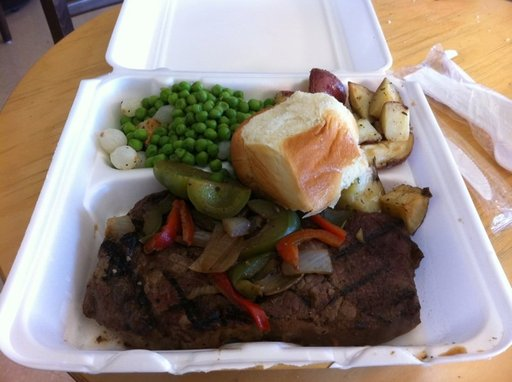

In [14]:
# Visualize an image
import random
from PIL import Image

#set seed
random.seed(42) # 42 is common in data science: has a meaning
# 1. Get all image paths as a list
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list[:3])
# 2. Get random image path
random_image_path = random.choice(image_path_list)
# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem
# 4 Open image
img = Image.open(random_image_path)
# 5 Print meta
print(f"Random Image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img


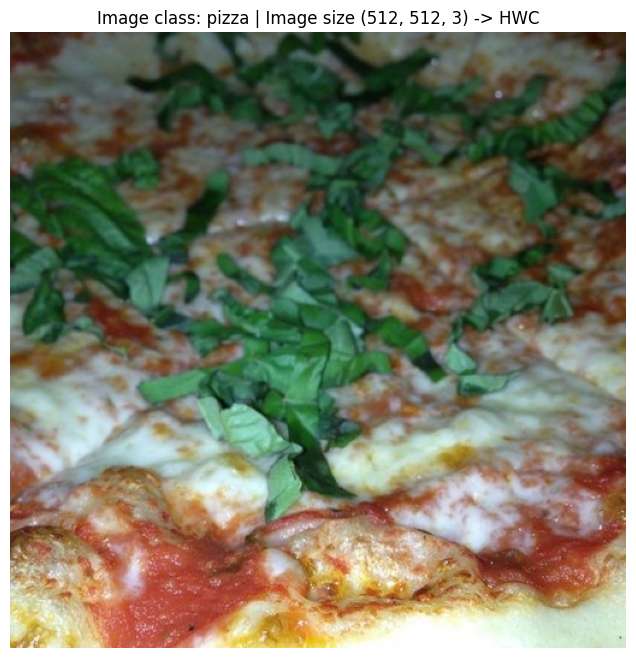

In [ ]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt
img_as_array = np.array(img)
plt.figure(figsize= (8,8))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image size {img_as_array.shape} -> HWC")
plt.axis("off")
plt.show()

In [15]:
# 3.1 Transforming data with torchvision.transforms
from torchvision.transforms import v2
data_transform = v2.Compose([
    v2.Resize(size=(64,64)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True)
])
data_transform

Compose(
      Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=warn)
      RandomHorizontalFlip(p=0.5)
      ToImage()
      ToDtype(scale=True)
)

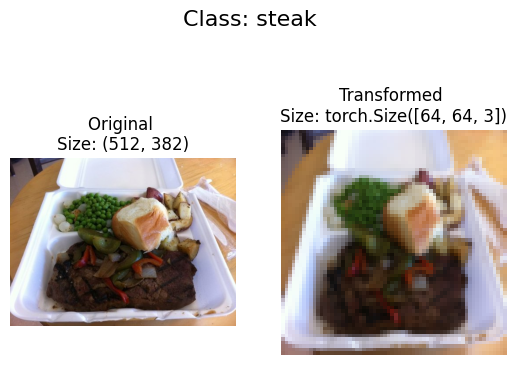

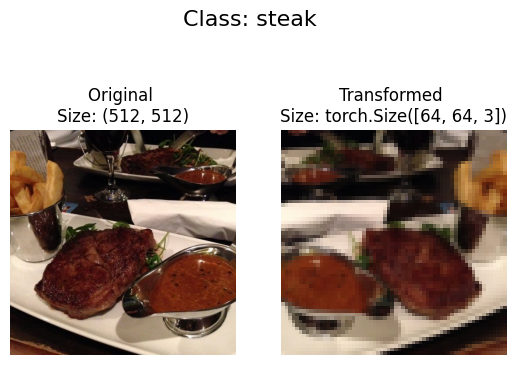

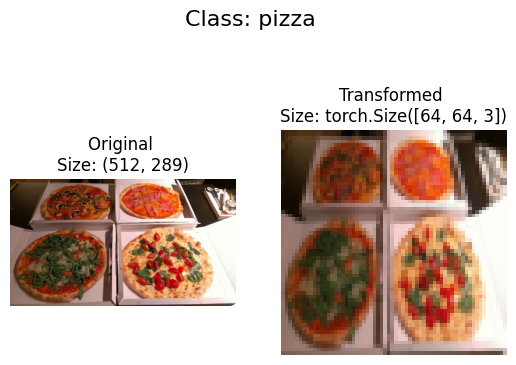

In [18]:
# Write a function to plot transformed images
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

### Load image data using `ImageFolder`

In [48]:
# Use ImageFolder to create dataset(s)
from torchvision.datasets import ImageFolder
train_data = ImageFolder(train_dir,transform=data_transform,target_transform=None)
test_data =  ImageFolder(root=test_dir,transform=data_transform,target_transform=None)
print(f"Train data: {train_data} \n Test data: {test_data}")



Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_sushi_steak/train
    StandardTransform
Transform: Compose(
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 ToImage()
                 ToDtype(scale=True)
           ) 
 Test data: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_sushi_steak/test
    StandardTransform
Transform: Compose(
                 Resize(size=[64, 64], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 ToImage()
                 ToDtype(scale=True)
           )


In [20]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [21]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [22]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [23]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 32
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7db91048ec20>,
 <torch.utils.data.dataloader.DataLoader at 0x7db91048e830>)

In [24]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

In [25]:
# iterate
img,label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [26]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) #
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 16 * 16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):

        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [27]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install -q torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 4. Create training and testing functions for `model_0`.

In [28]:

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

      # Put the model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader and data batches
    for X,y in dataloader:

        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate and accumulate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss


         # 3. Optimizer zero grad
        optimizer.zero_grad()


         # 4. Loss backward
        loss.backward()


        # 5. Optimizer step
        optimizer.step()


       # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(y_pred,dim=1)
        train_acc += (y == y_pred_class).sum().item()/len(y_pred)


  # Adjust metrics to get average loss and average accuracy per batch
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc


In [29]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():


    # Loop through DataLoader batches
    for X,y in dataloader:

      # Send data to target device
      X,y = X.to(device), y.to(device)


      # 1. Forward pass
      y_pred = model(X)


      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred,y)
      test_loss+= loss


      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(y_pred,dim=1)
      test_acc += (y == y_pred_class).sum().item()/len(y_pred)


      # Adjust metrics to get average loss and accuracy per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc


In [30]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [31]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_0_results_05 = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1073 | train_acc: 0.2461 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.1144 | train_acc: 0.3047 | test_loss: 1.1286 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0892 | train_acc: 0.4258 | test_loss: 1.1007 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1123 | train_acc: 0.3047 | test_loss: 1.1050 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0960 | train_acc: 0.2969 | test_loss: 1.1208 | test_acc: 0.2604


In [32]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

model_0_results_20 = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0947 | train_acc: 0.3281 | test_loss: 1.0944 | test_acc: 0.2812
Epoch: 2 | train_loss: 1.0941 | train_acc: 0.3203 | test_loss: 1.1050 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0744 | train_acc: 0.4922 | test_loss: 1.0791 | test_acc: 0.2917
Epoch: 4 | train_loss: 1.0737 | train_acc: 0.3281 | test_loss: 1.0821 | test_acc: 0.2917
Epoch: 5 | train_loss: 1.0879 | train_acc: 0.4141 | test_loss: 1.1079 | test_acc: 0.2604
Epoch: 6 | train_loss: 0.9956 | train_acc: 0.5703 | test_loss: 1.1133 | test_acc: 0.2917
Epoch: 7 | train_loss: 1.0755 | train_acc: 0.3711 | test_loss: 1.0736 | test_acc: 0.3125
Epoch: 8 | train_loss: 0.9777 | train_acc: 0.4922 | test_loss: 0.9914 | test_acc: 0.4924
Epoch: 9 | train_loss: 0.9755 | train_acc: 0.5000 | test_loss: 1.0120 | test_acc: 0.4129
Epoch: 10 | train_loss: 0.8010 | train_acc: 0.6484 | test_loss: 0.9365 | test_acc: 0.5833
Epoch: 11 | train_loss: 0.8592 | train_acc: 0.6172 | test_loss: 0.9583 | test_acc: 0.4025
Epoch: 12 | train_l

In [33]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(),
                             lr=0.001)


model_0_results_50 = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=50)


  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7117 | train_acc: 0.7305 | test_loss: 1.0945 | test_acc: 0.4441
Epoch: 2 | train_loss: 0.7256 | train_acc: 0.6992 | test_loss: 1.1005 | test_acc: 0.3835
Epoch: 3 | train_loss: 0.8847 | train_acc: 0.6211 | test_loss: 0.9524 | test_acc: 0.4536
Epoch: 4 | train_loss: 0.9493 | train_acc: 0.5234 | test_loss: 1.0959 | test_acc: 0.4034
Epoch: 5 | train_loss: 0.8479 | train_acc: 0.6133 | test_loss: 1.0917 | test_acc: 0.3930
Epoch: 6 | train_loss: 0.6374 | train_acc: 0.7383 | test_loss: 1.0601 | test_acc: 0.4044
Epoch: 7 | train_loss: 0.8193 | train_acc: 0.6094 | test_loss: 0.9760 | test_acc: 0.4337
Epoch: 8 | train_loss: 0.6909 | train_acc: 0.7344 | test_loss: 0.9793 | test_acc: 0.4953
Epoch: 9 | train_loss: 0.8038 | train_acc: 0.6133 | test_loss: 1.0648 | test_acc: 0.4337
Epoch: 10 | train_loss: 0.5897 | train_acc: 0.7500 | test_loss: 0.9974 | test_acc: 0.4631
Epoch: 11 | train_loss: 0.6471 | train_acc: 0.7656 | test_loss: 1.0195 | test_acc: 0.4744
Epoch: 12 | train_l

like our model is starting to get overfit towards the end (performing far better on the training data than on the testing data).we have to prevent overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=20,
                  output_shape=len(train_data.classes)).to(device)

model_1_results_20 = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        epochs=20)



  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.4345 | train_acc: 0.8398 | test_loss: 1.1043 | test_acc: 0.1979
Epoch: 2 | train_loss: 0.3663 | train_acc: 0.8477 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 3 | train_loss: 0.3966 | train_acc: 0.8125 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 4 | train_loss: 0.3829 | train_acc: 0.8477 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 5 | train_loss: 0.4827 | train_acc: 0.7539 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 6 | train_loss: 0.3437 | train_acc: 0.8828 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 7 | train_loss: 0.3119 | train_acc: 0.8750 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 8 | train_loss: 0.2686 | train_acc: 0.8828 | test_loss: 1.1038 | test_acc: 0.1979
Epoch: 9 | train_loss: 0.2686 | train_acc: 0.8984 | test_loss: 1.1042 | test_acc: 0.1979
Epoch: 10 | train_loss: 0.2569 | train_acc: 0.9062 | test_loss: 1.1040 | test_acc: 0.1979
Epoch: 11 | train_loss: 0.2471 | train_acc: 0.9062 | test_loss: 1.1041 | test_acc: 0.1979
Epoch: 12 | train_l

In [ ]:
summary(model_1, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 20, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 20, 64, 64]           560
│    └─ReLU: 2-2                         [1, 20, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 20, 64, 64]           3,620
│    └─ReLU: 2-4                         [1, 20, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 20, 32, 32]           --
├─Sequential: 1-2                        [1, 20, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 20, 32, 32]           3,620
│    └─ReLU: 2-7                         [1, 20, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 20, 32, 32]           3,620
│    └─ReLU: 2-9                         [1, 20, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 20, 16, 16]           --
├─Seq

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [34]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [36]:
# lets See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.


Excellent, we now have double the training and testing images...

In [37]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [38]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64),antialias=True),
  transforms.ToTensor()
])

train_data_20_percent = ImageFolder(train_data_20_percent_path,
                                    transform=simple_transform)

test_data_20_percent = ImageFolder(test_data_20_percent_path,
                                   transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(train_data_20_percent,
                                         batch_size=32,
                                         num_workers=os.cpu_count(),
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(test_data_20_percent,
                                        batch_size=32,
                                        num_workers=os.cpu_count(),
                                        shuffle=False)

In [40]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_2 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9795 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 2 | train_loss: 0.9701 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 3 | train_loss: 1.0301 | train_acc: 0.6771 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 4 | train_loss: 0.9989 | train_acc: 0.6771 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 5 | train_loss: 0.9867 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 6 | train_loss: 0.9785 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 7 | train_loss: 0.9722 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 8 | train_loss: 1.0280 | train_acc: 0.6458 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 9 | train_loss: 0.9828 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 10 | train_loss: 0.9805 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 11 | train_loss: 0.9746 | train_acc: 0.7083 | test_loss: 1.0979 | test_acc: 0.3625
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.


In [41]:
# Get a custom image
import requests
url = "https://github.com/lukmanaj/ArewaDS-Deep-Learning-with-PyTorch-Assignments/raw/main/data/images/pizza.jpeg"
custom_image = "pizza.jpeg"
with open(custom_image, "wb") as f:
  response = requests.get(url)
  f.write(response.content)


In [42]:
# Load image
import torchvision
img = torchvision.io.read_image(custom_image)


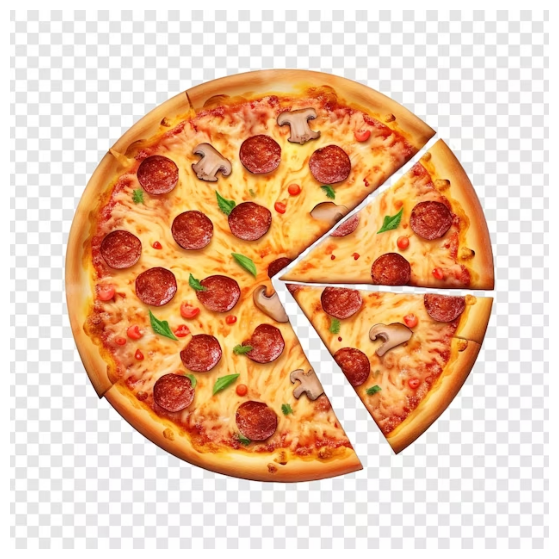

In [43]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

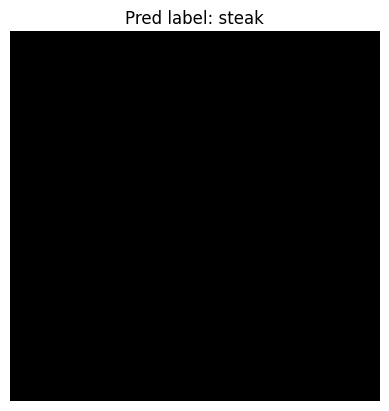

In [49]:
# Make a prediction on the image
model_2.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_2(batch)

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);

the model is still underperforming i cant even see the image